Importaciones y carga de datos

In [1]:
# Instalar la biblioteca kaggle
!pip install -q kaggle

# Crear el directorio .kaggle y mover el archivo kaggle.json allí
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de IMDB de Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Descomprimir el archivo descargado
!unzip imdb-dataset-of-50k-movie-reviews.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 93% 24.0M/25.7M [00:00<00:00, 126MB/s] 
100% 25.7M/25.7M [00:00<00:00, 122MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [2]:
import pandas as pd
import numpy as np
import keras

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Inicialización de las listas

In [7]:
review = []
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

Creación de etiquetas

In [9]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

División de datos de entrenamiento y prueba

In [10]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

Parámetros de configuración

In [11]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

Tokenización y acolchado de secuencias

In [12]:
!pip install keras
!pip install keras_preprocessing
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [13]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

Construcción del modelo

In [17]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compilación del modelo

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo

In [20]:
num_epocs = 10
history = model.fit(padded, train_labels, epochs=num_epocs, validation_data=(test_padded, test_labels))
pd.DataFrame(history.history)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 148s 115ms/step - accuracy: 0.6942 - loss: 0.5660 - val_accuracy: 0.7762 - val_loss: 0.5175
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 210s 121ms/step - accuracy: 0.8278 - loss: 0.4088 - val_accuracy: 0.8322 - val_loss: 0.3769
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 111ms/step - accuracy: 0.8866 - loss: 0.2874 - val_accuracy: 0.8338 - val_loss: 0.3904
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 112ms/step - accuracy: 0.9044 - loss: 0.2483 - val_accuracy: 0.8279 - val_loss: 0.3951
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 118ms/step - accuracy: 0.9167 - loss: 0.2203 - val_accuracy: 0.8455 - val_loss: 0.4041
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 111ms/step - accuracy: 0.9333 - loss: 0.1781 - val_accuracy: 0.8403 - val_loss: 0.4149
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 111ms/step - accuracy: 0.9536 - loss: 0.1379 - val_accuracy: 0.8397 - val_loss: 0.4843
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 111ms/step - ac

,accuracy,loss,val_accuracy,val_loss
0,0.726325,0.535462,0.7762,0.517506
1,0.845750,0.371052,0.8322,0.376866
2,0.882725,0.293063,0.8338,0.390417
3,0.899925,0.256670,0.8279,0.395141
4,0.913350,0.226741,0.8455,0.404085
5,0.929025,0.188568,0.8403,0.414881
6,0.947175,0.149881,0.8397,0.484284
7,0.957775,0.123689,0.8334,0.567961
8,0.968675,0.097407,0.8351,0.562259
9,0.973500,0.084214,0.8293,0.617722


<Axes: >

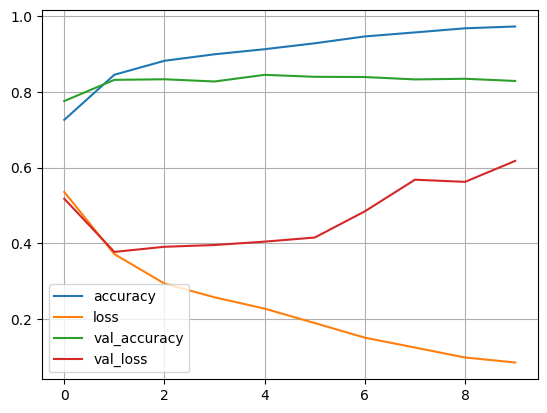

In [21]:
pd.DataFrame(history.history).plot(grid=True)
